<a href="https://colab.research.google.com/github/PratikshaShelke24/data-science/blob/main/mlpratices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
session11  || Machine leraning implementation ||
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
           'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
           'hours_per_week', 'native_country', 'income']

In [ ]:
data = pd.read_csv(url, header=None, names=columns, na_values=" ?", sep=",\s*", engine="python")

In [ ]:
print("Dataset Overview:")
print(data.head())

Dataset Overview:
   age         workclass  fnlwgt  education  education_num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital_gain  capital_loss  hours_per_week native_country income  
0          2174             0              40  United-States  <=50K  
1             0         

In [ ]:
data = data.dropna()

In [ ]:
label_encoders = {}
categorical_columns = ['workclass', 'education', 'marital_status', 'occupation',
                       'relationship', 'race', 'sex', 'native_country', 'income']

In [ ]:
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [ ]:
X = data.drop('income', axis=1)  # Features
y = data['income']  # Target (0 or 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 0.8246583755565792

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4942
           1       0.71      0.46      0.56      1571

    accuracy                           0.82      6513
   macro avg       0.78      0.70      0.72      6513
weighted avg       0.81      0.82      0.81      6513



In [ ]:
sample = [[37, 4, 120000, 10, 0, 2, 1, 0, 1, 5000, 0, 40, 39, 15]]  # Example person
sample_scaled = scaler.transform(sample)
income_pred = model.predict(sample_scaled)
print("\nPrediction for sample:", ">$50K" if income_pred[0] == 1 else "<=50K")


Prediction for sample: >$50K


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# machine leraing example || second

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['species'] = iris.target

In [ ]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
# Display the first few rows of the dataset
print("Dataset Overview:")
print(data.head())

Dataset Overview:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [ ]:
# Split the data into features (X) and target (y)
X = data.iloc[:, :-1]  # Features
y = data['species']    # Target

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



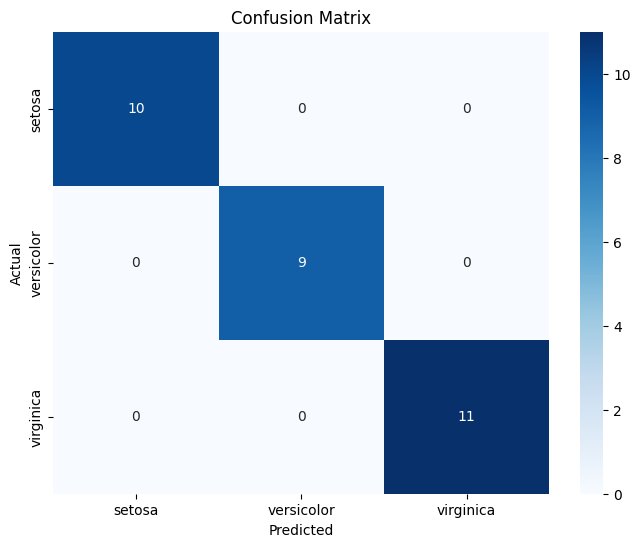

In [ ]:
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
#Linear Regression

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Step 1: Generate a simple dataset
# Example: Predicting house prices based on house size
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # Random house sizes (independent variable)
y = 3 + 4 * X + np.random.randn(100, 1)  # House prices (dependent variable) with some noise

In [ ]:
#Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

# Step 3: Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Step 4: Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)            # R-squared score

In [ ]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error: 0.65
R-squared Score: 0.89


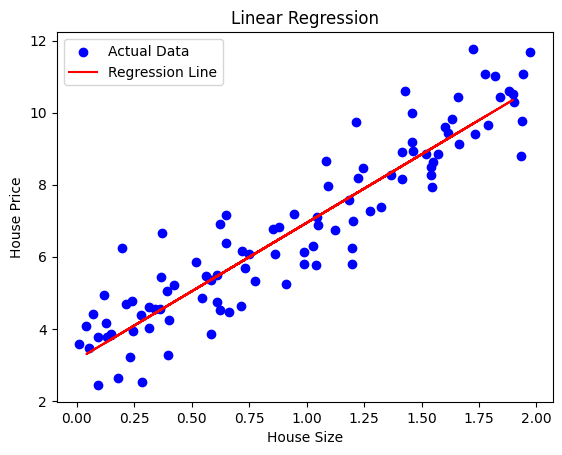

In [ ]:
# Step 6: Visualize the results
plt.scatter(X, y, color="blue", label="Actual Data")  # Original data points
plt.plot(X_test, y_pred, color="red", label="Regression Line")  # Regression line
plt.title("Linear Regression")
plt.xlabel("House Size")
plt.ylabel("House Price")
plt.legend()
plt.show()

In [ ]:
#logistic regression

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features for simplicity
y = (iris.target == 0).astype(int)  # Binary classification: Is the flower 'Setosa' (class 0)?

In [ ]:
# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

# Step 3: Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:

# Step 4: Make predictions
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [ ]:
# Detailed performance metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



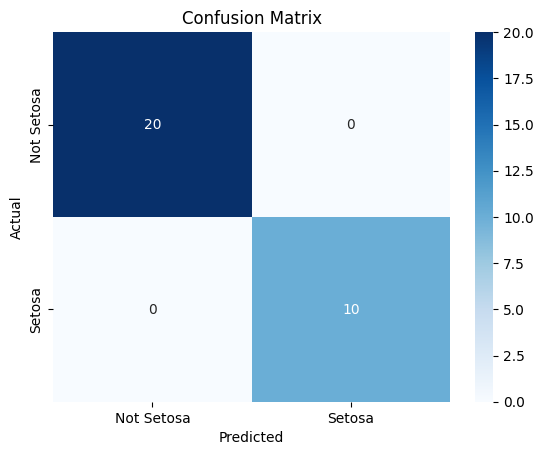

In [ ]:
# Step 6: Visualize the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Setosa', 'Setosa'], yticklabels=['Not Setosa', 'Setosa'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
#Polynomial Regression implementation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [ ]:
# Generating synthetic dataset
np.random.seed(0)
X = np.linspace(0, 10, 100).reshape(-1, 1)  # Feature (reshaped for sklearn)
y = 2 + 3*X - 4*X**2 + 2*X**3 + np.random.normal(0, 10, size=X.shape)  # Cubic function with noise


In [ ]:
#Transform Features to Polynomial
degree = 3  # Choose the degree of polynomial
poly = PolynomialFeatures(degree=degree)  # Transform features into polynomial terms
X_poly = poly.fit_transform(X)  # Transform input features


In [ ]:
#Train Polynomial Regression Model
model = LinearRegression()  # Linear model
model.fit(X_poly, y)  # Train on transformed features
y_pred = model.predict(X_poly)  # Predict on transformed features


In [ ]:
# Evaluate the Model
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 85.31


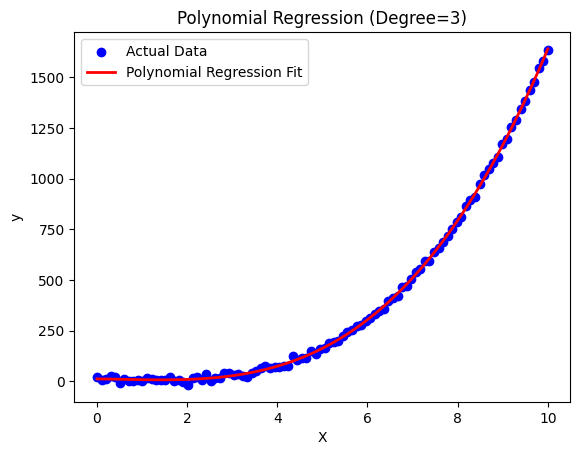

In [ ]:
#Visualize the Results
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Polynomial Regression Fit')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title(f"Polynomial Regression (Degree={degree})")
plt.show()


In [ ]:
#Polynomial Regression implementation
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [ ]:
# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([2, 4, 9, 15, 25])  # Non-linear trend

In [ ]:
# Convert X to polynomial (degree=2)
poly = PolynomialFeatures(degree=2)
#is used to generate polynomial features from the input data, allowing the model to capture non-linear relationships between features.
X_poly = poly.fit_transform(X)

In [ ]:
# Train the model
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [ ]:
# Predictions
y_pred = model.predict(X_poly)

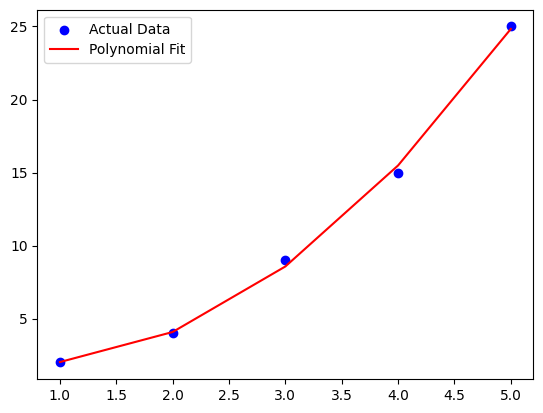

In [ ]:
plt.scatter(X, y, color='blue', label="Actual Data")
plt.plot(X, y_pred, color='red', label="Polynomial Fit")
plt.legend()# helps to differentiate and label various elements (like lines, points, or other visual objects)
plt.show()

In [ ]:
#Support Vector Regression implementation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

In [ ]:
# Sample data (House Size vs Price)
X = np.array([600, 800, 1000, 1200, 1400]).reshape(-1, 1)
y = np.array([150000, 180000, 200000, 220000, 240000])

In [ ]:
# Create SVR model with a radial basis function (RBF) kernel
svr = SVR(kernel='rbf', C=1000, epsilon=10000)
#Uses Radial Basis Function (RBF) Kernel, which helps capture non-linear patterns.
#Regularization parameter – Higher C makes the model more sensitive to outliers
#Margin of tolerance – Defines a range where errors are ignored
svr.fit(X, y)

SVR(C=1000, epsilon=10000)

In [ ]:
# Predict prices
y_pred = svr.predict(X)

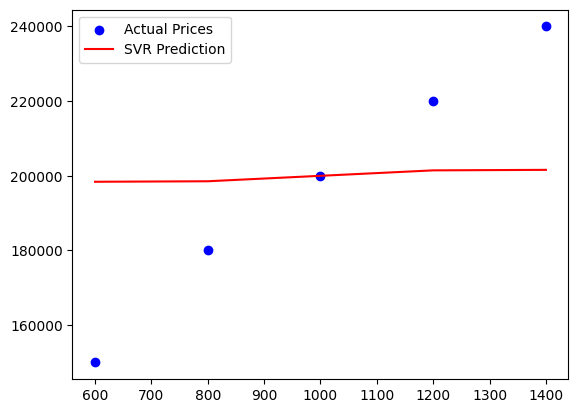

In [ ]:
# Plot results
plt.scatter(X, y, color='blue', label="Actual Prices")
plt.plot(X, y_pred, color='red', label="SVR Prediction")
plt.legend()
plt.show()